In [2]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df_info = pd.read_csv('lending_club_info.csv')
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [21]:
df=pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


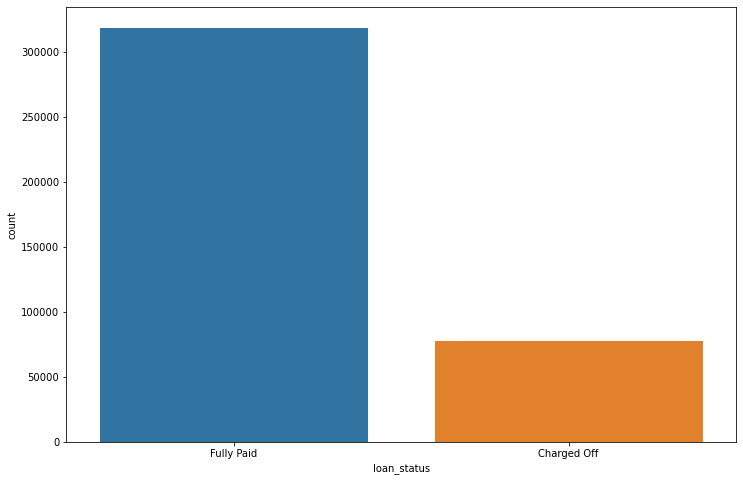

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(df['loan_status'])

In [23]:
plt.figure(figsize=(10,7))
sns.histplot(df['loan_amnt'],bins=40)

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 720x504 with 0 Axes>

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,xticklabels=False,cmap='viridis')
plt.ylim(10,0)

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [ ]:
feat_info('installment')

In [ ]:
def feat_info(st):
  return df_info[df_info['LoanStatNew']==st]['Description'].iloc[0]

In [ ]:
feat_info('')

In [ ]:
for item in df_info['LoanStatNew'].values:
  print(item,end='  :   ')
  print(feat_info(item))

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

In [ ]:
df.columns

In [ ]:
df['grade'].unique()

In [ ]:
df['sub_grade'].unique()

In [ ]:
feat_info('grade')

In [ ]:
feat_info('sub_grade')

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='grade',hue='loan_status',data=df)

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

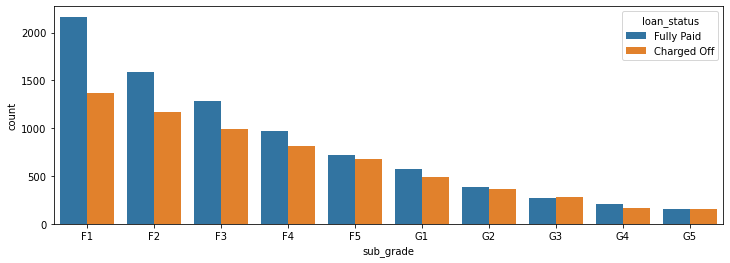

In [24]:
f_and_g=df[(df['grade']=='F') | (df['grade']== 'G')]

plt.figure(figsize=(12,4))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,hue='loan_status')

In [25]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1 , 'Charged Off':0})

In [26]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


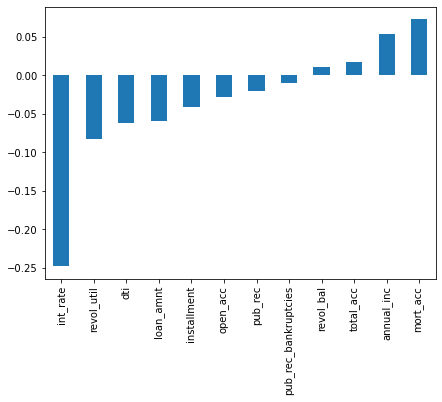

In [27]:
plt.figure(figsize=(7,5))
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

In [28]:
len(df)

396030

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [30]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [31]:
df['emp_title'].nunique()

173105

In [32]:
feat_info('emp_title')

'The job title supplied by the Borrower when applying for the loan.*'

In [33]:
feat_info('emp_length')

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

In [34]:
df['emp_title'].value_counts()

Teacher                   4389
Manager                   4250
Registered Nurse          1856
RN                        1846
Supervisor                1830
                          ... 
Cost Schedule Analyst        1
Iron Horse Interactive       1
Unify solutions Inc          1
Sonus Networks               1
Douglas School System        1
Name: emp_title, Length: 173105, dtype: int64

In [35]:
df.drop('emp_title',axis=1,inplace=True)

In [36]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

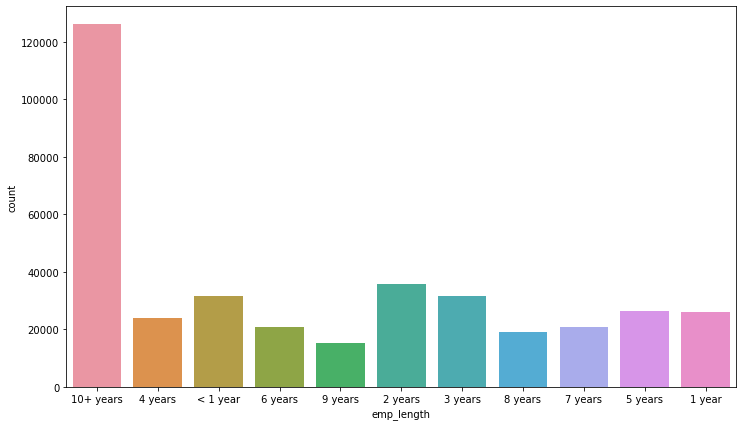

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(df['emp_length'])

In [38]:
df.groupby('loan_status')['emp_length'].value_counts()

loan_status  emp_length
Charged Off  10+ years      23215
             2 years         6924
             < 1 year        6563
             3 years         6182
             1 year          5154
             5 years         5092
             4 years         4608
             7 years         4055
             6 years         3943
             8 years         3829
             9 years         3070
Fully Paid   10+ years     102826
             2 years        28903
             3 years        25483
             < 1 year       25162
             5 years        21403
             1 year         20728
             4 years        19344
             6 years        16898
             7 years        16764
             8 years        15339
             9 years        12244
Name: emp_length, dtype: int64

In [39]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [40]:
df.drop('emp_length',axis=1,inplace=True)

In [41]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [42]:
feat_info('purpose')

'A category provided by the borrower for the loan request. '

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [44]:
df.drop('title',axis=1,inplace=True)

In [45]:
feat_info('mort_acc')

'Number of mortgage accounts.'

In [46]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [47]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [48]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [49]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [50]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else: return mort_acc

In [51]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [53]:
df=df.dropna()

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [56]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [57]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [58]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [59]:
df.drop('grade',axis=1,inplace=True)

In [60]:
dummies=pd.get_dummies(df[['sub_grade']],drop_first=True)

In [61]:
df.drop('sub_grade',axis=1,inplace=True)

In [62]:
df=pd.concat([df,dummies],axis=1)

In [63]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

In [67]:
dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [68]:
df=pd.concat([df,dummies],axis=1)

In [69]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line'], dtype='object')

In [74]:
df.drop('address',axis=1,inplace=True)

In [76]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 395219, dtype: object

In [78]:
temp=df['loan_status']

In [79]:
df['loan_status']=df['loan_status'].map({'Fully Paid':1,'Charges Off':0})

In [81]:
df['home_ownership'].head(7)

0        RENT
1    MORTGAGE
2        RENT
3        RENT
4    MORTGAGE
5    MORTGAGE
6    MORTGAGE
Name: home_ownership, dtype: object

In [82]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [83]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [85]:
df['home_ownership'].replace(['ANY','NONE'],'OTHER',inplace=True)

In [87]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [90]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df,dummies],axis=1)

In [91]:
df.drop('home_ownership',axis=1,inplace=True)

In [92]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line'], dtype='object')

In [94]:
df['issue_d'].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [95]:
df.drop('issue_d',axis=1,inplace=True)

In [96]:
feat_info('earliest_cr_line')

"The month the borrower's earliest reported credit line was opened"

In [97]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [99]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [101]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda term: term.year)

In [102]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [105]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,1.0,26.24,1990,16.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,1.0,22.05,2004,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,1.0,12.79,2007,13.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,1.0,2.60,2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,NaN,33.95,1999,13.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.drop('loan_status',axis=1)

In [109]:
X=df.drop('loan_repaid',axis=1)
y=df['loan_repaid']

In [110]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [112]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model=Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [114]:
x_train.shape

(276653, 69)